In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv('C:/Users/chandranshu/Desktop/linear regression python/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [4]:
raw_data['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [5]:
raw_data['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [6]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
raw_data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
len(raw_data)

4345

In [9]:
#so here there are 172 na values of price and 150 out of EngineV out of 4345 data points
#by rule of thumb if less than 5% of data is Na we can safely drop it, so we drop it here

In [10]:
data_nona=raw_data.dropna(axis=0)

In [11]:
data_nona.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

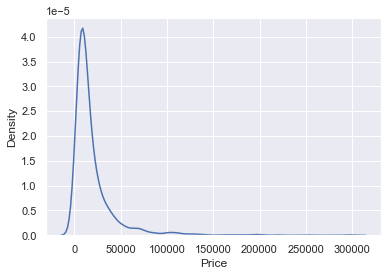

In [12]:
sns.distplot(data_nona['Price'],hist=False)

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

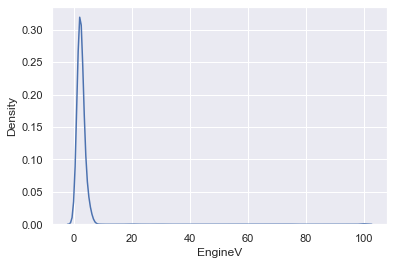

In [13]:
sns.distplot(data_nona['EngineV'],hist=False)

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

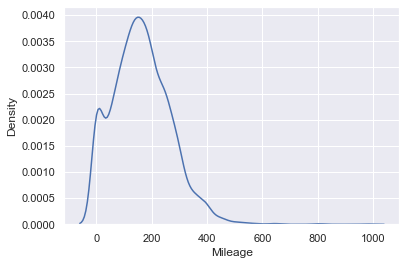

In [14]:
sns.distplot(data_nona['Mileage'],hist=False)

In [15]:
#so we see that the above graphs are positively skewed , and there are some expnsive cars which are excellent in all features

In [17]:
#removing outliers

In [18]:
#finding 99 th quantile
q=data_nona['Price'].quantile(0.99)
#taking data less than 99 quantile
data_1=data_nona[data_nona['Price']<q]
#describe data new
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

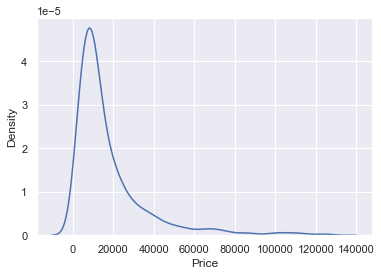

In [19]:
#visualise the price of new data
sns.distplot(data_1['Price'],hist=False)

In [20]:
#finding 99 th quantile
q2=data_1['Mileage'].quantile(0.99)
#taking data less than 99 quantile
data_2=data_1[data_1['Mileage']<q2]
#describe data new
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


In [21]:
#finding 99 th quantile
q3=data_2['EngineV'].quantile(0.99)
#taking data less than 99 quantile
data_3=data_2[data_2['EngineV']<q3]
#describe data new
data_3.describe()

,Price,Mileage,EngineV,Year
count,3894.000000,3894.000000,3894.000000,3894.000000
mean,17823.805845,161.598100,2.417681,2006.397021
std,18919.010466,96.176488,0.896970,6.611338
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2012.000000
max,129222.000000,435.000000,5.700000,2016.000000


C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

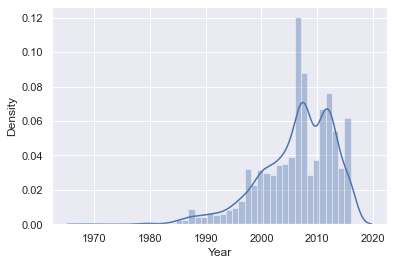

In [22]:
sns.distplot(data_3['Year'])

In [23]:
q4=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q4]

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

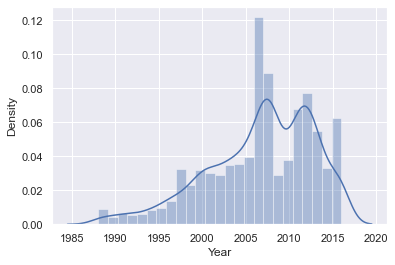

In [24]:
sns.distplot(data_4['Year'])

In [25]:
data_clean=data_4.reset_index(drop=True)

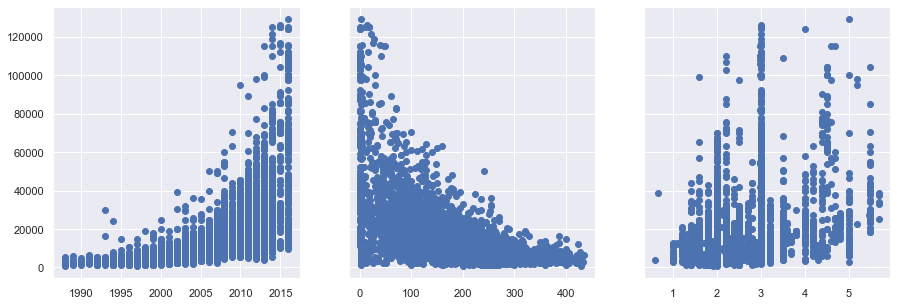

In [26]:
#Check OlS assumptions
f,(g1,g2,g3)=plt.subplots(1,3,sharey=True,figsize=(15,5))
g1.scatter(data_clean['Year'],data_clean['Price'])
g2.scatter(data_clean['Mileage'],data_clean['Price'])
g3.scatter(data_clean['EngineV'],data_clean['Price'])

in all 3 graphs we see a non linear trend. Now we can use log transform of price to cure it

In [27]:
log_Price=np.log(data_clean['Price'])
data_clean['log_Price']=log_Price

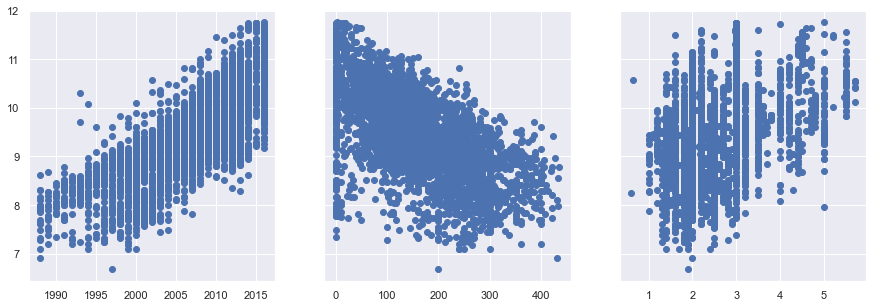

In [28]:
f,(g1,g2,g3)=plt.subplots(1,3,sharey=True,figsize=(15,5))
g1.scatter(data_clean['Year'],data_clean['log_Price'])
g2.scatter(data_clean['Mileage'],data_clean['log_Price'])
g3.scatter(data_clean['EngineV'],data_clean['log_Price'])

In [29]:
data_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


In [30]:
#now a linear trend is seen , indicating homoscedasticity, so linear regression can be applied\
#so we drop Price
data_clean=data_clean.drop(['Price','Model'],axis=1)

In [31]:
#check multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= data_clean[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [33]:
vif

,VIF,features
0,3.798257,Mileage
1,8.262153,EngineV
2,10.823028,Year


In [34]:
#as Vif over 10 is indicator of multicoll, we drop year from data
data_nomulticol=data_clean.drop(['Year'],axis=1)

In [35]:
#create dummy variables
data_dummy=pd.get_dummies(data_nomulticol,drop_first=True)
data_dummy.head()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [36]:
(data_dummy.columns.values)

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= data_dummy[data_dummy.columns.values[0:19]]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [38]:
vif

,VIF,features
0,4.552054,Mileage
1,14.852786,EngineV
2,43.679678,log_Price
3,2.624505,Brand_BMW
4,3.053677,Brand_Mercedes-Benz
5,1.837404,Brand_Mitsubishi
6,2.295639,Brand_Renault
7,2.426677,Brand_Toyota
8,3.336827,Brand_Volkswagen
9,1.601709,Body_hatch


In [39]:
data_preprocessed=data_dummy.drop(['Registration_yes'],axis=1)

In [40]:
data_preprocessed

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3836,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3837,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3838,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
y=data_preprocessed['log_Price']
x=data_preprocessed.drop('log_Price',axis=1)

In [42]:
x

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3836,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3837,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3838,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [43]:
#scaledata
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=365)

In [45]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [46]:
reg.intercept_

9.40251471266301

In [47]:
reg.coef_

array([-0.53566648,  0.22121142,  0.04065359,  0.06724505, -0.10402115,
       -0.12343377, -0.01245149, -0.02712853, -0.17910941, -0.09817265,
       -0.21662801, -0.16045429, -0.12894794, -0.07176005, -0.03026408,
       -0.09184429])

In [48]:
y_hat=reg.predict(x_train)

<Figure size 1080x504 with 0 Axes>

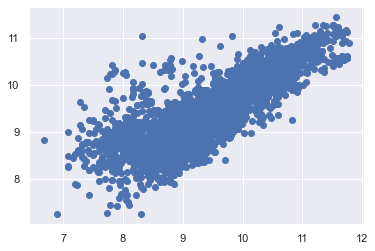

<Figure size 1080x504 with 0 Axes>

In [49]:
plt.scatter(y_train,y_hat)
plt.figure(figsize=(15,7))

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Price', ylabel='Density'>

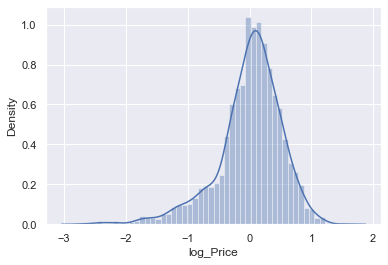

In [50]:
sns.distplot(y_train-y_hat)

In [51]:
reg.score(x_train,y_train)

0.6399080354594745

In [52]:
#summary table
reg_summary=pd.DataFrame(x.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_

In [53]:
reg_summary

,Features,Weights
0,Mileage,-0.535666
1,EngineV,0.221211
2,Brand_BMW,0.040654
3,Brand_Mercedes-Benz,0.067245
4,Brand_Mitsubishi,-0.104021
5,Brand_Renault,-0.123434
6,Brand_Toyota,-0.012451
7,Brand_Volkswagen,-0.027129
8,Body_hatch,-0.179109
9,Body_other,-0.098173


In [54]:
#testing

In [55]:
y_hat_test=reg.predict(x_test)

<Figure size 1080x504 with 0 Axes>

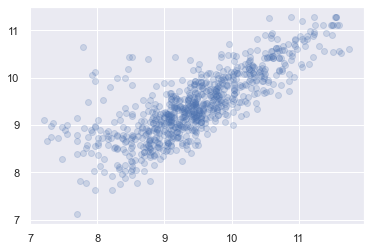

<Figure size 1080x504 with 0 Axes>

In [56]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.figure(figsize=(15,7))

In [57]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])

In [58]:
df_pf.head()

,Prediction
0,15744.037850
1,6036.305340
2,9986.810086
3,19197.306812
4,11573.354722


In [59]:
y_test=y_test.reset_index(drop=True)

In [60]:
df_pf['Target']=np.exp(y_test)

In [61]:
df_pf

,Prediction,Target
0,15744.037850,8800.0
1,6036.305340,5200.0
2,9986.810086,18100.0
3,19197.306812,15700.0
4,11573.354722,9600.0
...,...,...
763,5965.985001,4950.0
764,16762.146685,16000.0
765,7184.558335,5400.0
766,3182.073194,4100.0


In [63]:
df_pf['Residual']=df_pf['Target']-df_pf['Prediction']

In [65]:
df_pf['diff%']=np.absolute(df_pf['Residual']/df_pf['Target'])*100

In [66]:
df_pf.describe()

,Prediction,Target,Residual,diff%
count,768.000000,768.000000,768.000000,768.000000
mean,16005.744283,18297.171302,2291.427020,48.462549
std,13328.863055,18743.891850,10562.050538,98.823313
min,1228.312065,1350.000000,-39975.952348,0.034865
25%,7413.797415,7300.000000,-2137.510776,14.121800
50%,11599.786510,12350.000000,1072.912976,27.991123
75%,19780.544402,20814.787500,4544.540744,45.668991
max,79491.748989,126000.000000,86153.690917,1665.664681


C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Residual', ylabel='Density'>

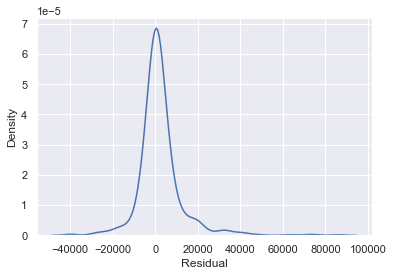

In [74]:
sns.distplot(df_pf['Residual'],hist=False)

So we see that the distribution of error is normal

Also, we conclude that as :<br/>
1)The distribution of errors is normally distributed.<br/>
2)There is linear relation between X and Y variables.<br/>
3)There is no relation between independent variable(no multicollinearity).<br/>
4)No autocorrelation.<br/>
5)No hetroscedasticity.The error variance is almost constant.<br/>
So,we can conclude that linear regression can be fitted .

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
mse=mean_absolute_error(y_test,y_hat_test)
r2=r2_score(y_test,y_hat_test)
print('Mse is :',mse)
print('R^2 is :',r2)

Mse is : 0.3846421371447873
R^2 is : 0.622315713679116
